In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/home/stomps/repos/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh


import cymetric as cym
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,12)
             
             
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

A/NR 
            Time      A/NR
179  14.916667  4.563317 


A/R 
            Time        A/R
179  14.916667  43.462694 


B/NR 
            Time       B/NR
179  14.916667  11.641253 


B/R 
            Time        B/R
179  14.916667  45.788984 


C/NR 
            Time      C/NR
179  14.916667  4.563317 


C/R 
            Time        C/R
179  14.916667  43.462694 


REF 
            Time        REF
179  14.916667  62.802106 




(0, 15)

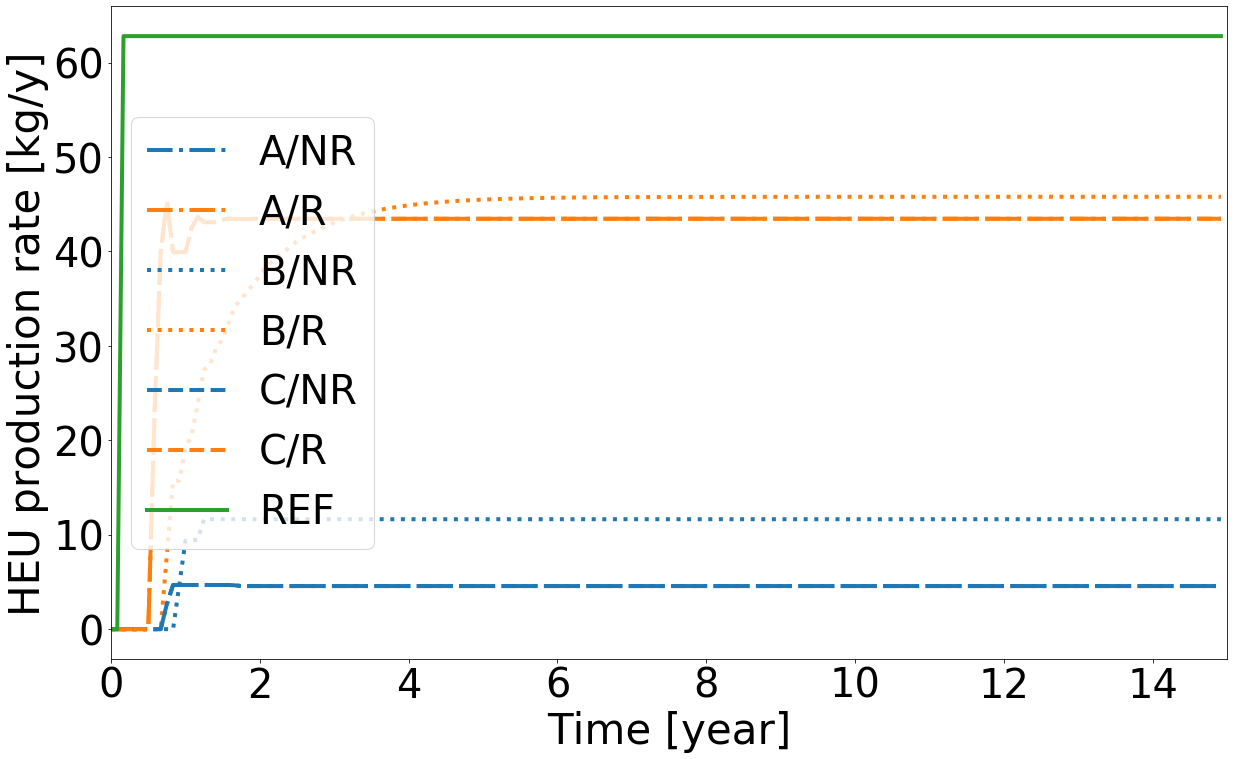

In [2]:
files = ['case_1/NR_25_3_1_1.sqlite',
         'case_1/R_25_4_1.sqlite',
         'case_2/NR_24_3_1_1_1.sqlite',
         'case_2/R_25_3_1_1.sqlite',
         'case_3/NR_25_3_1_1.sqlite',
         'case_3/R_25_4_1.sqlite',
         'ref/ref.sqlite']
invs = ['storage_3',
        'storage_2',
        'storage_4',
        'storage_3',
        'storage_3',
        'storage_2',
        'storage']

c_names = ['A/NR','A/R','B/NR','B/R','C/NR','C/R','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []
style = ['-.', '-.', ':', ':', '--','--','-']
color = ['C0', 'C1', 'C0', 'C1', 'C0','C1','C2']


for i in range(7):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    #df_ = tm.inventories(ev_, [invs[i]])
    #df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    
    df_ = tm.transactions(ev_, receivers=[invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_[c_names[i]] *= 12
    df_['Time'] *= 1/12.
    
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], "\n ", df_.tail(1), "\n\n")
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU production rate [kg/y]", linestyle=style, color=color, mk="", lw=4 )
plt.xlabel('Time [year]')
plt.savefig('HEU_prod_time.png')

x = np.arange(0, 16, 1)
plt.xlim(0,15)


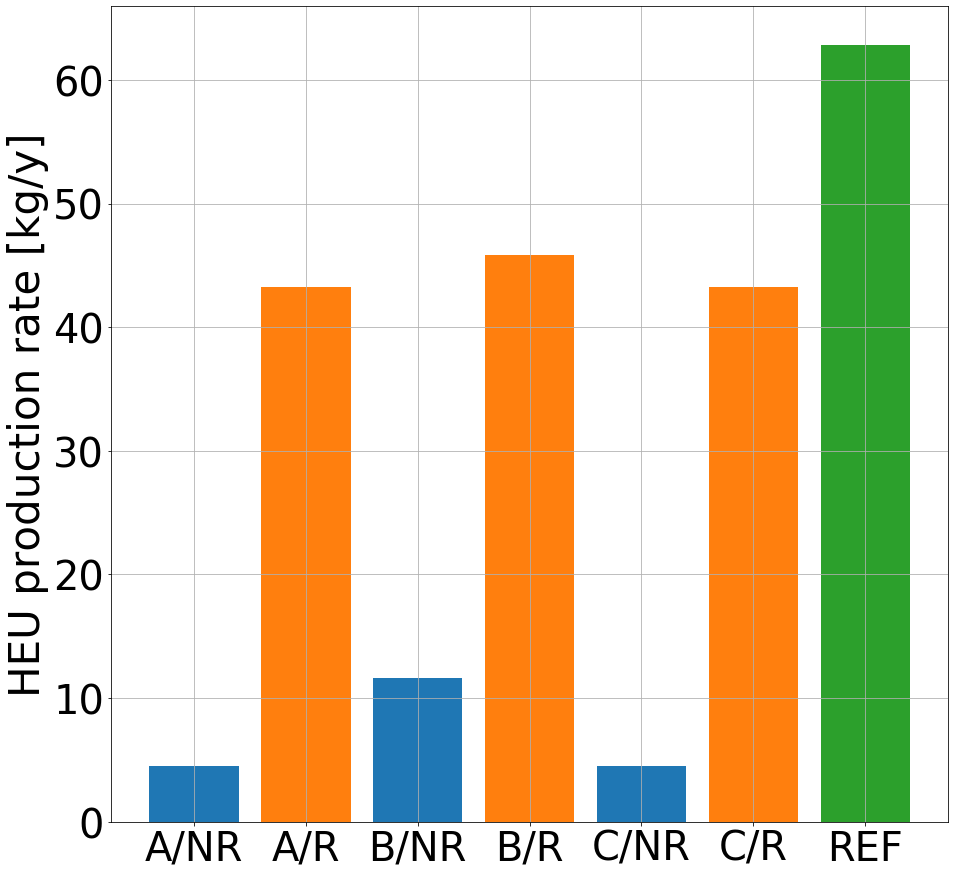

In [3]:

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15)

#old_data = (1.887142, 19.129037, 16.94547, 38.278425, 1.887142, 19.129037, 51.677497)
# Collected manually from above
# Old - before change in BNR cycle
#data = (6.408032,64.955078,28.92795,65.908707,6.408032,71.318676,174.410434)
data = (4.53546,43.261191,11.660775,45.804863,4.53546,43.261191,62.802106)
ind =np.arange(len(data))
plt.bar(ind, data, align='center', color=color )
plt.xticks(ind, c_names)
plt.ylabel('HEU production rate [kg/y]')
plt.grid()
plt.savefig("HEU_prod_rate.png")

A/NR/25/3/1/1             Time  A/NR/25/3/1/1
179  14.916667       0.980931 

A/R/25/4/1             Time  A/R/25/4/1
179  14.916667    0.941732 

B/NR/24/3/1/1/1             Time  B/NR/24/3/1/1/1
179  14.916667         0.978923 

B/R/25/3/1/1             Time  B/R/25/3/1/1
179  14.916667      0.937956 

C/NR/25/3/1/1             Time  C/NR/25/3/1/1
179  14.916667        0.98857 

C/R/25/4/1             Time  C/R/25/4/1
179  14.916667    0.960074 

REF             Time       REF
179  14.916667  0.908696 



(0.75, 1)

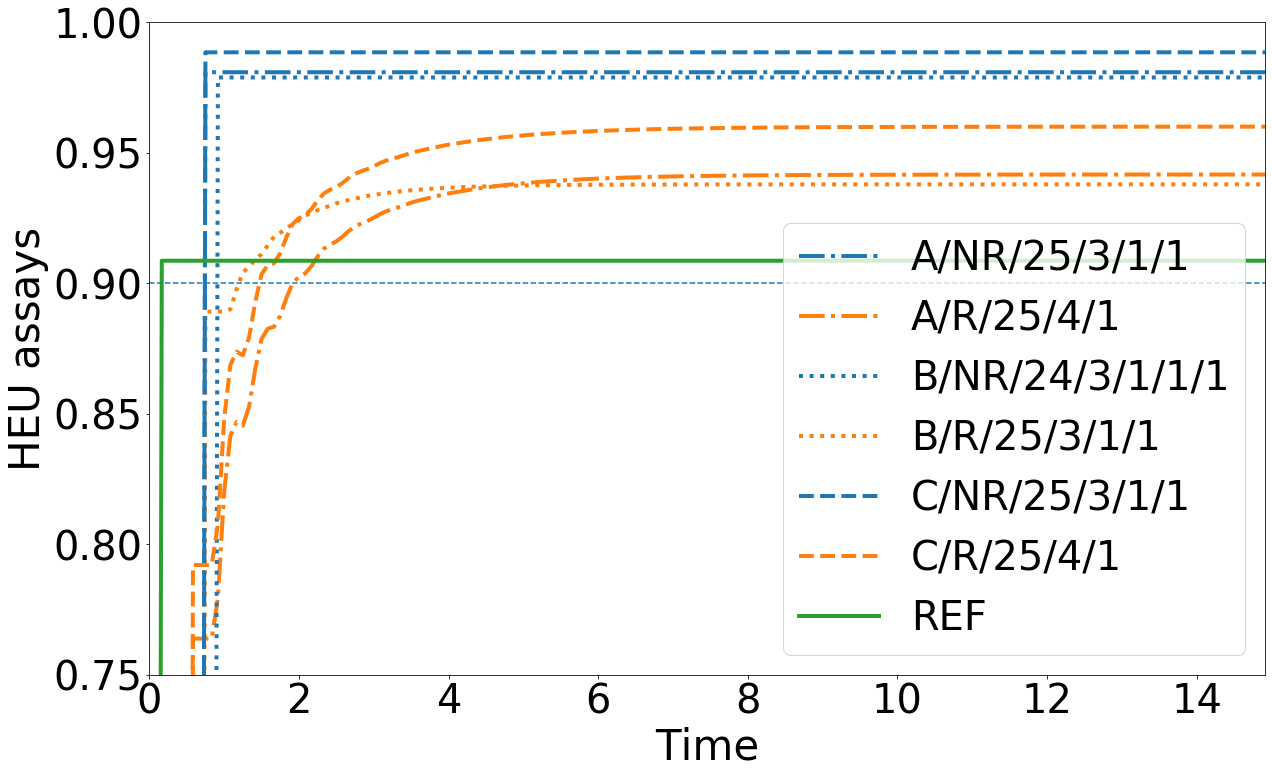

In [4]:
files = ['case_1/NR_25_3_1_1.sqlite',
         'case_1/R_25_4_1.sqlite',
         'case_2/NR_24_3_1_1_1.sqlite',
         'case_2/R_25_3_1_1.sqlite',
         'case_3/NR_25_3_1_1.sqlite',
         'case_3/R_25_4_1.sqlite',
         'ref/ref.sqlite']
receivers = ['storage_3',
        'storage_2',
        'storage_4',
        'storage_3',
        'storage_3',
        'storage_2',
        'storage']
nucs1 = ['238U']
nucs2 = ['235U']
uma_238u = 238050786.996e-6
uma_235u = 235043928.190e-6
style = ['-.', '-.', ':', ':', '--','--','-']
color = ['C0', 'C1', 'C0', 'C1', 'C0','C1','C2']

c_names = ['A/NR/25/3/1/1','A/R/25/4/1','B/NR/24/3/1/1/1','B/R/25/3/1/1','C/NR/25/3/1/1','C/R/25/4/1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(7):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)
    df_ = cyh.TransFrac(ev=ev_, rec=[receivers[i]],  nucs1=nucs1, nucs2=nucs2, factor1=uma_238u, factor2=uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
 
    df_['Time'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], " ", df_.tail(1), "\n")

pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU assays", linestyle=style, color=color, mk="", lw=4  )
plt.axhline(y=0.9, linestyle="--")
plt.savefig('heu_assays_config_labelled.png')

x = np.arange(0, 16, 1)
plt.ylim(0.75,1)

NR_24_4_1_1             Time  NR_24_4_1_1
179  14.916667     0.980931 

NR_25_2_2_1             Time  NR_25_2_2_1
179  14.916667     0.980931 

NR_26_2_1_1             Time  NR_26_2_1_1
179  14.916667     0.980931 

NR_25_3_1_1             Time  NR_25_3_1_1
179  14.916667     0.980931 

REF             Time       REF
179  14.916667  0.908696 



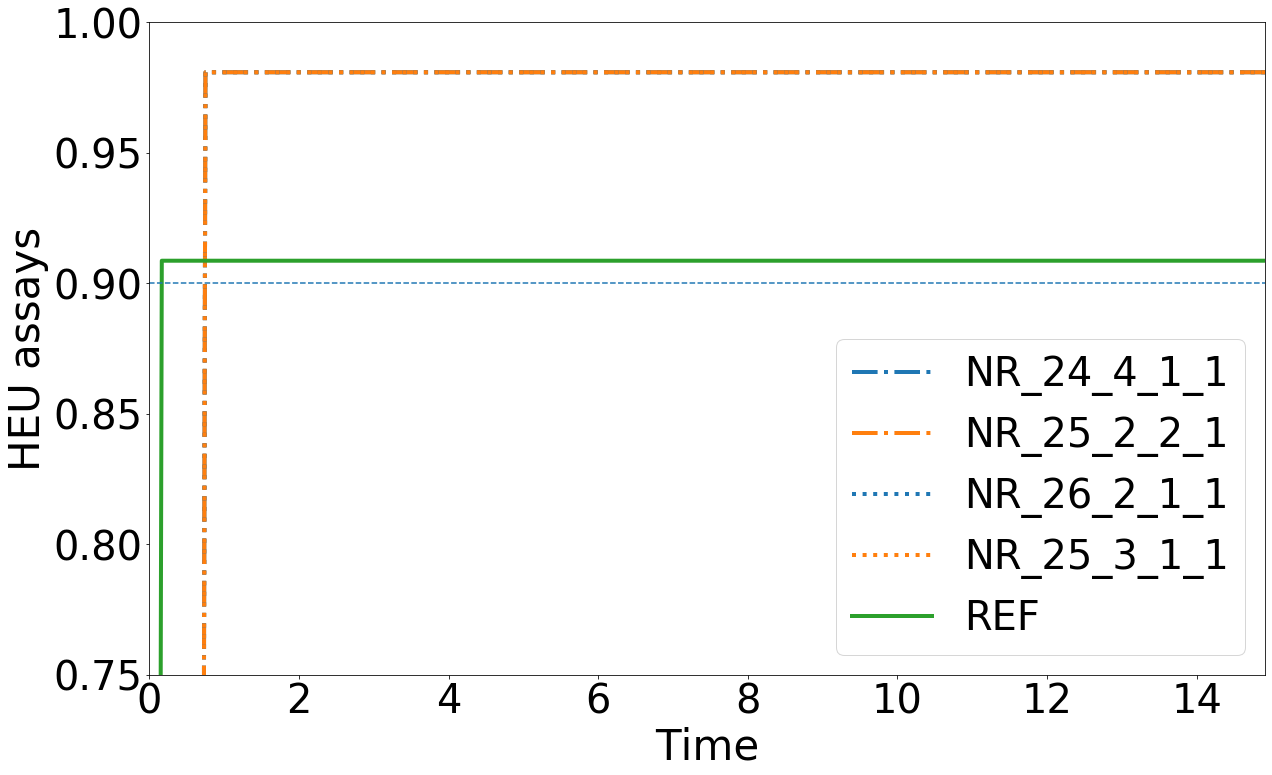

In [5]:
######################
# CASE 1: NO RECYCLING
files = ['case_1/NR_24_4_1_1.sqlite',
         'case_1/NR_25_2_2_1.sqlite',
         'case_1/NR_26_2_1_1.sqlite',
         'case_1/NR_25_3_1_1.sqlite',
         'ref/ref.sqlite']
receivers = ['storage_3',
        'storage_3',
        'storage_3',
        'storage_3',
        'storage']
nucs1 = ['238U']
nucs2 = ['235U']
uma_238u = 238050786.996e-6
uma_235u = 235043928.190e-6
style = ['-.', '-.', ':', ':', '-']
color = ['C0', 'C1', 'C0', 'C1','C2']

c_names = ['NR_24_4_1_1','NR_25_2_2_1','NR_26_2_1_1','NR_25_3_1_1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(5):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)
    df_ = cyh.TransFrac(ev=ev_, rec=[receivers[i]],  nucs1=nucs1, nucs2=nucs2, factor1=uma_238u, factor2=uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
 
    df_['Time'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], " ", df_.tail(1), "\n")

pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU assays", linestyle=style, color=color, mk="", lw=4  )
plt.axhline(y=0.9, linestyle="--")

x = np.arange(0, 16, 1)
plt.ylim(0.75,1)
plt.savefig('ANR_assays.png')

NR_24_4_1_1 
            Time  NR_24_4_1_1
179  14.916667     4.380784 


NR_25_2_2_1 
            Time  NR_25_2_2_1
179  14.916667     3.117533 


NR_26_2_1_1 
            Time  NR_26_2_1_1
179  14.916667     3.117533 


NR_25_3_1_1 
            Time  NR_25_3_1_1
179  14.916667     4.563317 


REF 
            Time        REF
179  14.916667  62.802106 




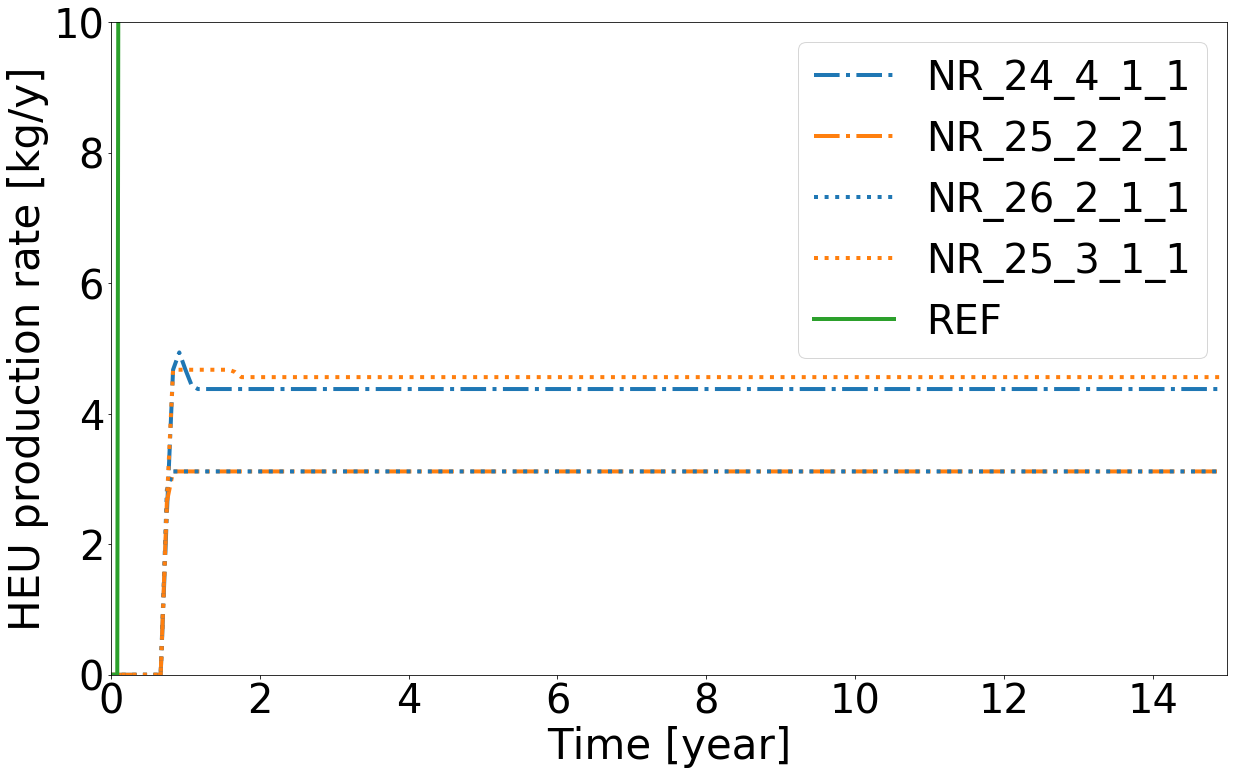

In [6]:
files = ['case_1/NR_24_4_1_1.sqlite',
         'case_1/NR_25_2_2_1.sqlite',
         'case_1/NR_26_2_1_1.sqlite',
         'case_1/NR_25_3_1_1.sqlite',
         'ref/ref.sqlite']
invs = ['storage_3',
        'storage_3',
        'storage_3',
        'storage_3',
        'storage']

c_names = ['NR_24_4_1_1','NR_25_2_2_1','NR_26_2_1_1','NR_25_3_1_1','REF']
LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []
style = ['-.', '-.', ':', ':', '-']
color = ['C0', 'C1', 'C0', 'C1', 'C2']


for i in range(5):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    #df_ = tm.inventories(ev_, [invs[i]])
    #df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    
    df_ = tm.transactions(ev_, receivers=[invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_[c_names[i]] *= 12
    df_['Time'] *= 1/12.
    
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], "\n ", df_.tail(1), "\n\n")
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU production rate [kg/y]", linestyle=style, color=color, mk="", lw=4 )
plt.xlabel('Time [year]')

x = np.arange(0, 16, 1)
plt.xlim(0,15)
plt.ylim(0,10)
plt.savefig('ANR_production.png')


R_25_4_1             Time  R_25_4_1
179  14.916667  0.941732 

R_26_3_1             Time  R_26_3_1
179  14.916667  0.917524 

R_27_2_1             Time  R_27_2_1
179  14.916667  0.852102 

REF             Time       REF
179  14.916667  0.908696 



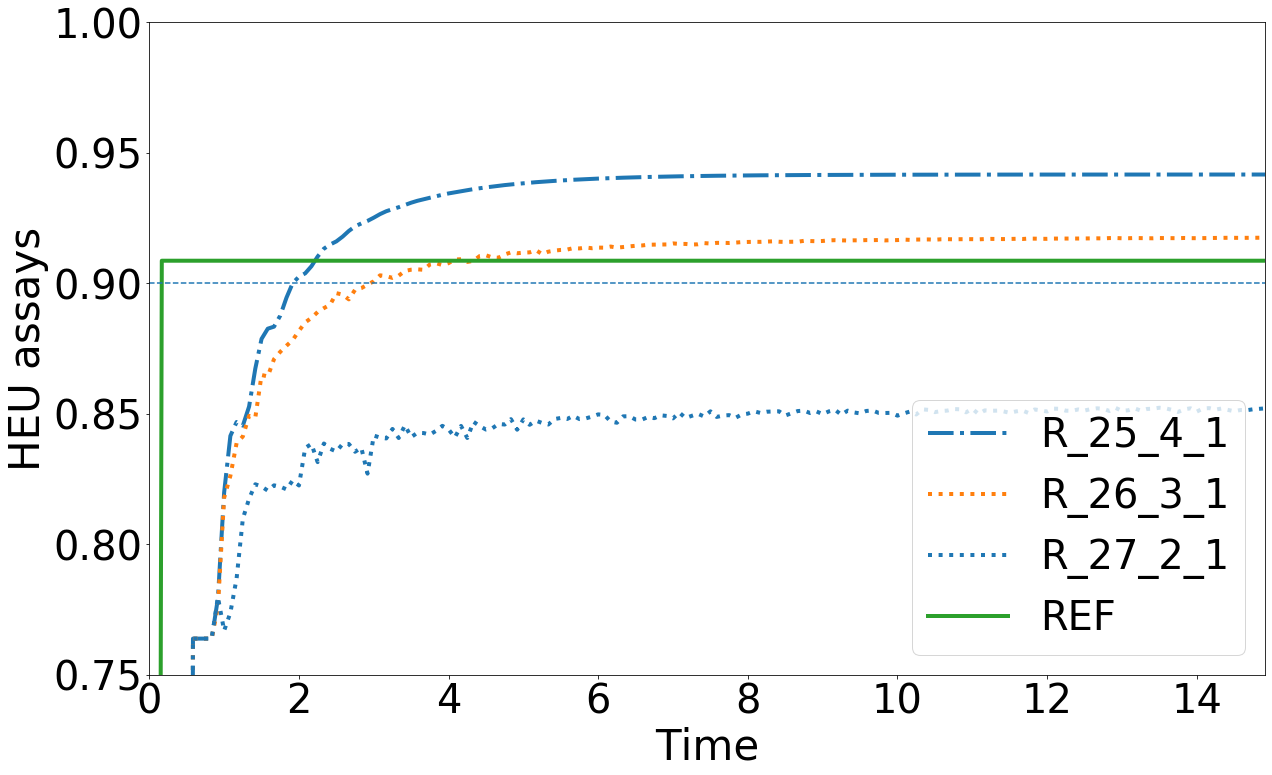

In [7]:
######################
# CASE 1: RECYCLING
files = ['case_1/R_25_4_1.sqlite',
         'case_1/R_26_3_1.sqlite',
         'case_1/R_27_2_1.sqlite',
         'ref/ref.sqlite']
receivers = ['storage_2',
        'storage_2',
        'storage_2',
        'storage']
nucs1 = ['238U']
nucs2 = ['235U']
uma_238u = 238050786.996e-6
uma_235u = 235043928.190e-6
style = ['-.', ':', ':', '-']
color = ['C0', 'C1', 'C0','C2']

c_names = ['R_25_4_1','R_26_3_1','R_27_2_1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(4):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)
    df_ = cyh.TransFrac(ev=ev_, rec=[receivers[i]],  nucs1=nucs1, nucs2=nucs2, factor1=uma_238u, factor2=uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
 
    df_['Time'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], " ", df_.tail(1), "\n")

pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU assays", linestyle=style, color=color, mk="", lw=4  )
plt.axhline(y=0.9, linestyle="--")

x = np.arange(0, 16, 1)
plt.ylim(0.75,1)
plt.savefig('AR_assays.png')

R_25_4_1 
            Time   R_25_4_1
179  14.916667  43.462694 


R_26_3_1 
            Time  R_26_3_1
179  14.916667  39.93401 


R_27_2_1 
            Time   R_27_2_1
179  14.916667  26.622673 


REF 
            Time        REF
179  14.916667  62.802106 




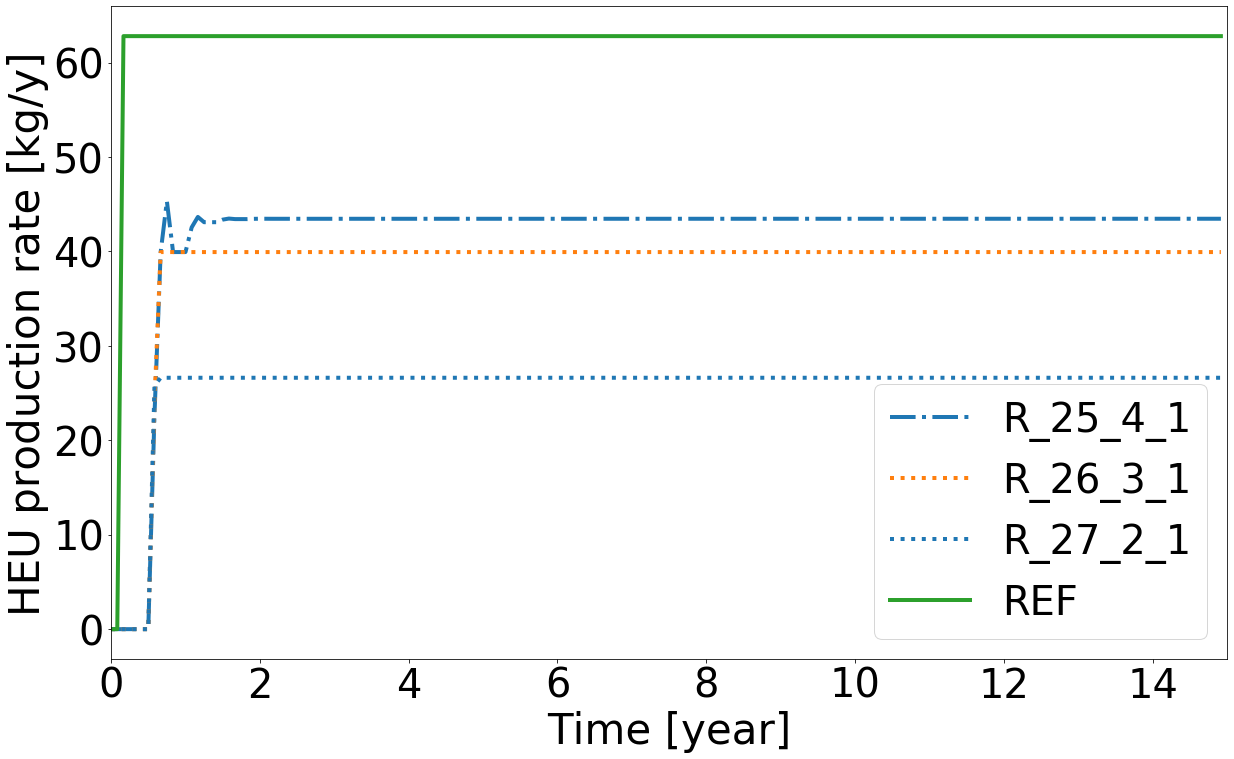

In [8]:
files = ['case_1/R_25_4_1.sqlite',
         'case_1/R_26_3_1.sqlite',
         'case_1/R_27_2_1.sqlite',
         'ref/ref.sqlite']
invs = ['storage_2',
        'storage_2',
        'storage_2',
        'storage']

c_names = ['R_25_4_1','R_26_3_1','R_27_2_1','REF']
LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []
style = ['-.', ':', ':', '-']
color = ['C0', 'C1', 'C0','C2']


for i in range(4):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    #df_ = tm.inventories(ev_, [invs[i]])
    #df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    
    df_ = tm.transactions(ev_, receivers=[invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_[c_names[i]] *= 12
    df_['Time'] *= 1/12.
    
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], "\n ", df_.tail(1), "\n\n")
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU production rate [kg/y]", linestyle=style, color=color, mk="", lw=4 )
plt.xlabel('Time [year]')

x = np.arange(0, 16, 1)
plt.xlim(0,15)
plt.savefig('AR_production.png')


NR_24_3_1_1_1             Time  NR_24_3_1_1_1
179  14.916667       0.978923 

NR_25_2_1_1_1             Time  NR_25_2_1_1_1
179  14.916667       0.978923 

NR_23_4_1_1_1             Time  NR_23_4_1_1_1
179  14.916667       0.978923 

NR_23_3_2_1_1             Time  NR_23_3_2_1_1
179  14.916667       0.978923 

NR_26_1_1_1_1             Time  NR_26_1_1_1_1
179  14.916667       0.978923 

REF             Time       REF
179  14.916667  0.908696 



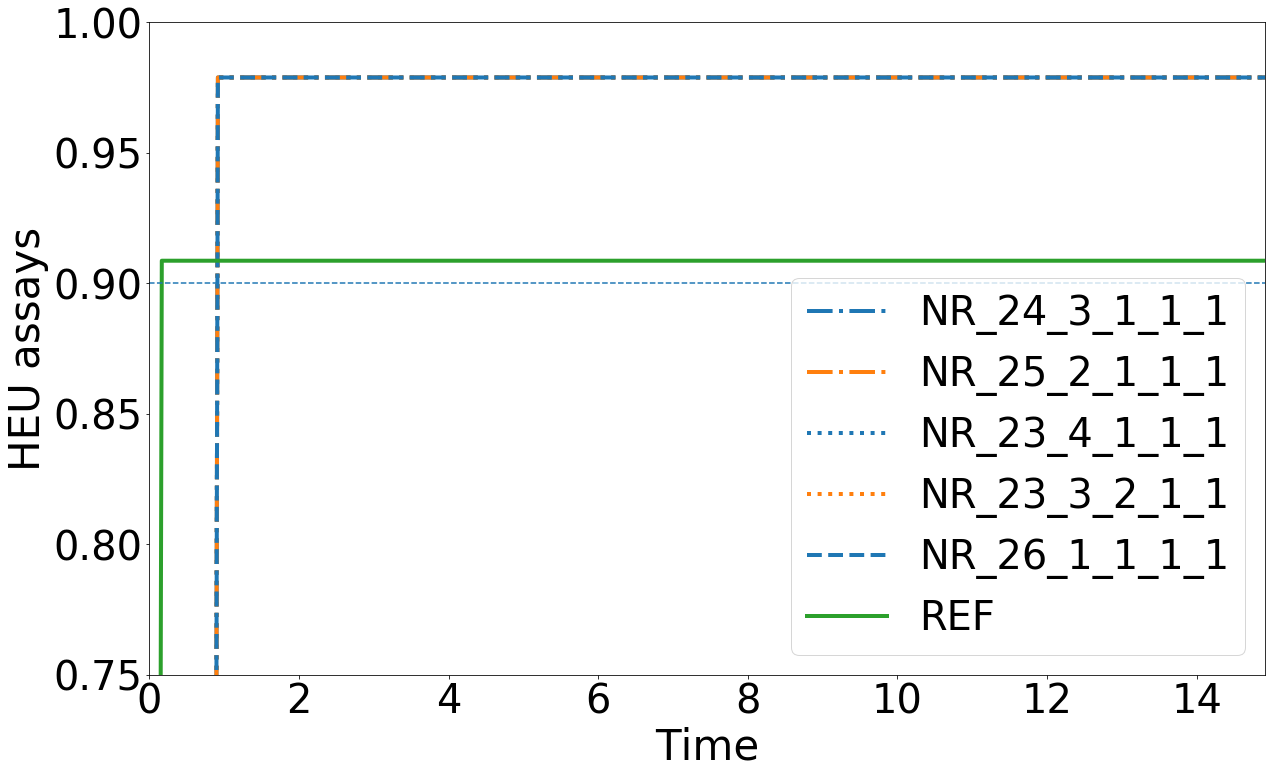

In [9]:
######################
# CASE 2: NO RECYCLING
files = ['case_2/NR_24_3_1_1_1.sqlite',
         'case_2/NR_25_2_1_1_1.sqlite',
         'case_2/NR_23_4_1_1_1.sqlite',
         'case_2/NR_23_3_2_1_1.sqlite',
         'case_2/NR_26_1_1_1_1.sqlite',
         'ref/ref.sqlite']
receivers = ['storage_4',
        'storage_4',
        'storage_4',
        'storage_4',
        'storage_4',
        'storage']
nucs1 = ['238U']
nucs2 = ['235U']
uma_238u = 238050786.996e-6
uma_235u = 235043928.190e-6
style = ['-.', '-.', ':', ':', '--','-']
color = ['C0', 'C1', 'C0', 'C1', 'C0','C2']

c_names = ['NR_24_3_1_1_1','NR_25_2_1_1_1','NR_23_4_1_1_1','NR_23_3_2_1_1','NR_26_1_1_1_1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(6):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)
    df_ = cyh.TransFrac(ev=ev_, rec=[receivers[i]],  nucs1=nucs1, nucs2=nucs2, factor1=uma_238u, factor2=uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
 
    df_['Time'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], " ", df_.tail(1), "\n")

pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU assays", linestyle=style, color=color, mk="", lw=4  )
plt.axhline(y=0.9, linestyle="--")

x = np.arange(0, 16, 1)
plt.ylim(0.75,1)
plt.savefig('BNR_assays.png')

NR_24_3_1_1_1 
            Time  NR_24_3_1_1_1
179  14.916667      11.641253 


NR_25_2_1_1_1 
            Time  NR_25_2_1_1_1
179  14.916667       9.350668 


NR_23_4_1_1_1 
            Time  NR_23_4_1_1_1
179  14.916667      11.156201 


NR_23_3_2_1_1 
            Time  NR_23_3_2_1_1
179  14.916667      11.156201 


NR_26_1_1_1_1 
            Time  NR_26_1_1_1_1
179  14.916667       4.675334 


REF 
            Time        REF
179  14.916667  62.802106 




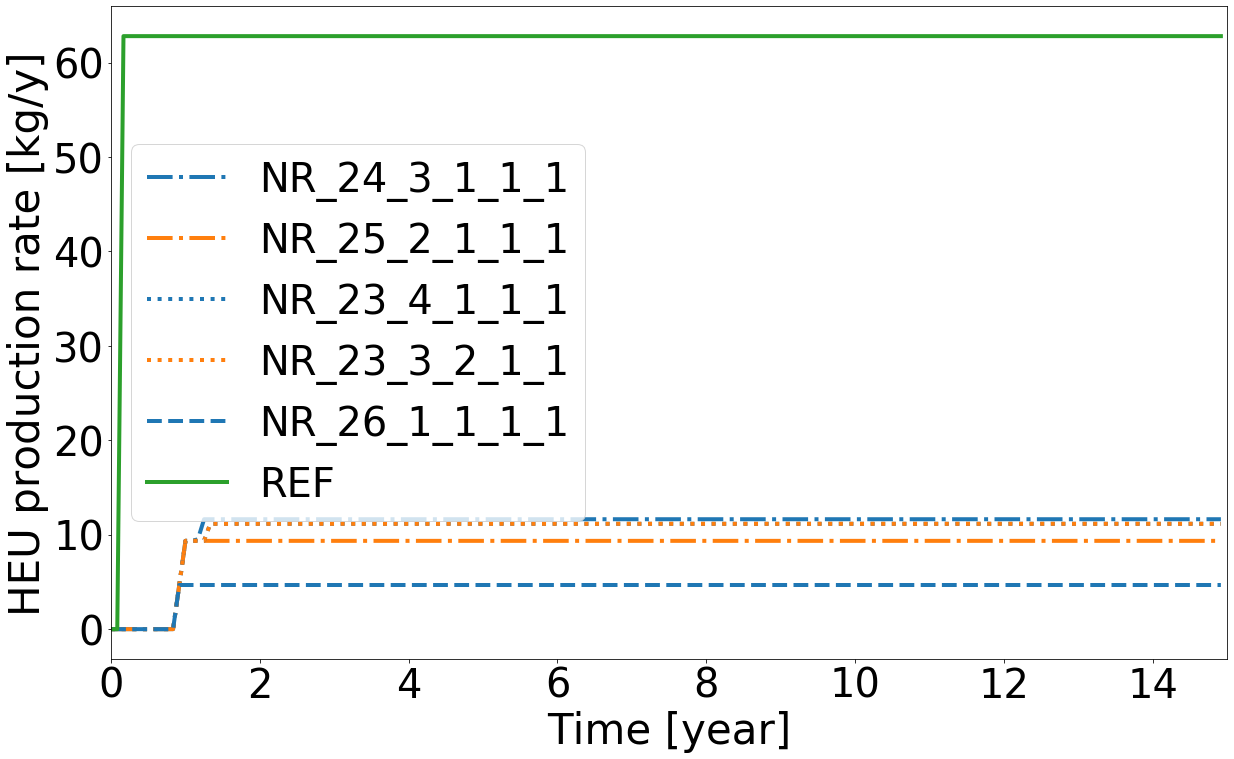

In [10]:
files = ['case_2/NR_24_3_1_1_1.sqlite',
         'case_2/NR_25_2_1_1_1.sqlite',
         'case_2/NR_23_4_1_1_1.sqlite',
         'case_2/NR_23_3_2_1_1.sqlite',
         'case_2/NR_26_1_1_1_1.sqlite',
         'ref/ref.sqlite']
invs = ['storage_4',
        'storage_4',
        'storage_4',
        'storage_4',
        'storage_4',
        'storage']

c_names = ['NR_24_3_1_1_1','NR_25_2_1_1_1','NR_23_4_1_1_1','NR_23_3_2_1_1','NR_26_1_1_1_1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []
style = ['-.', '-.', ':', ':', '--','-']
color = ['C0', 'C1', 'C0', 'C1', 'C0','C2']


for i in range(6):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    #df_ = tm.inventories(ev_, [invs[i]])
    #df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    
    df_ = tm.transactions(ev_, receivers=[invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_[c_names[i]] *= 12
    df_['Time'] *= 1/12.
    
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], "\n ", df_.tail(1), "\n\n")
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU production rate [kg/y]", linestyle=style, color=color, mk="", lw=4 )
plt.xlabel('Time [year]')

x = np.arange(0, 16, 1)
plt.xlim(0,15)
plt.savefig('BNR_production.png')


R_24_4_1_1             Time  R_24_4_1_1
179  14.916667    0.937956 

R_25_3_1_1             Time  R_25_3_1_1
179  14.916667    0.937956 

R_26_2_1_1             Time  R_26_2_1_1
179  14.916667    0.925327 

REF             Time       REF
179  14.916667  0.908696 



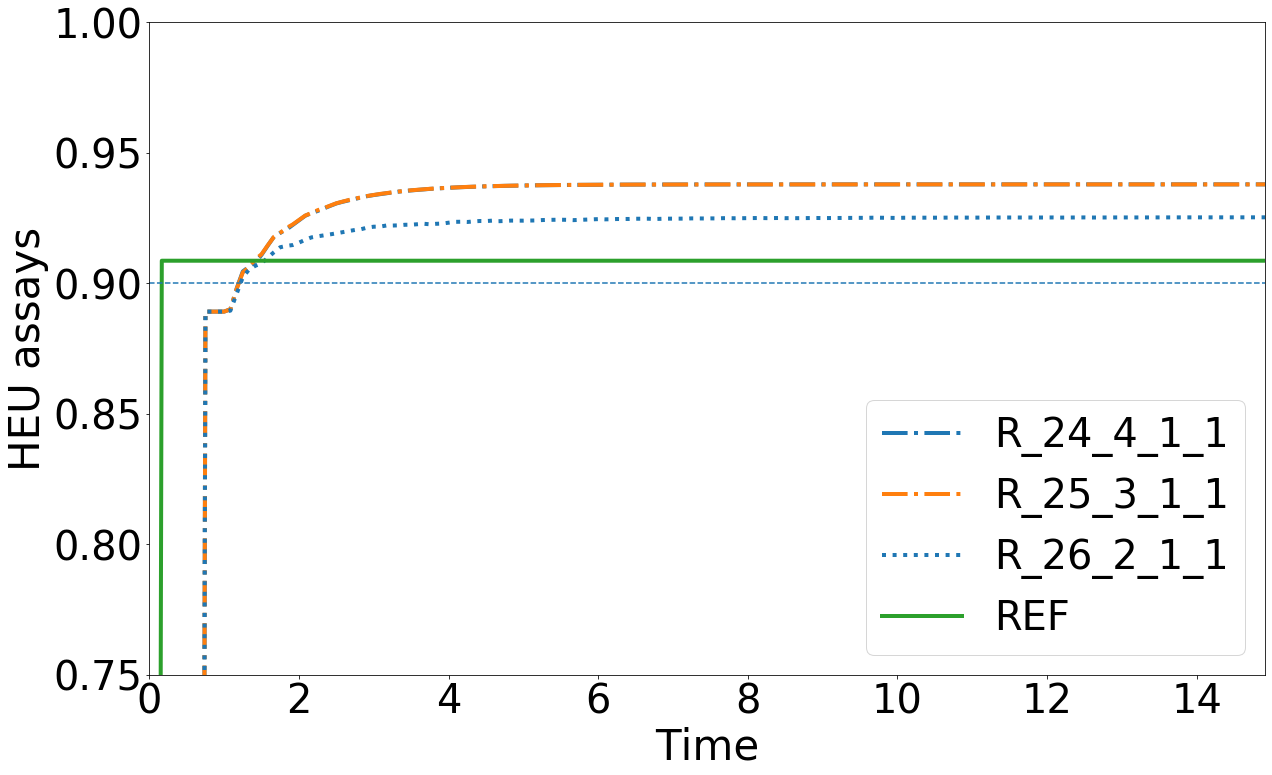

In [11]:
##############
# CASE 2: RECYCLING
files = ['case_2/R_24_4_1_1.sqlite',
         'case_2/R_25_3_1_1.sqlite',
         'case_2/R_26_2_1_1.sqlite',
         'ref/ref.sqlite']
receivers = ['storage_3',
        'storage_3',
        'storage_3',
        'storage']
nucs1 = ['238U']
nucs2 = ['235U']
uma_238u = 238050786.996e-6
uma_235u = 235043928.190e-6
style = ['-.', '-.', ':','-']
color = ['C0', 'C1', 'C0','C2']

c_names = ['R_24_4_1_1','R_25_3_1_1','R_26_2_1_1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(4):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)
    df_ = cyh.TransFrac(ev=ev_, rec=[receivers[i]],  nucs1=nucs1, nucs2=nucs2, factor1=uma_238u, factor2=uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
 
    df_['Time'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], " ", df_.tail(1), "\n")

pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU assays", linestyle=style, color=color, mk="", lw=4  )
plt.axhline(y=0.9, linestyle="--")

x = np.arange(0, 16, 1)
plt.ylim(0.75,1)
plt.savefig('BR_assays.png')

R_24_4_1_1 
            Time  R_24_4_1_1
179  14.916667   43.957614 


R_25_3_1_1 
            Time  R_25_3_1_1
179  14.916667   45.788984 


R_26_2_1_1 
            Time  R_26_2_1_1
179  14.916667   26.686189 


REF 
            Time        REF
179  14.916667  62.802106 




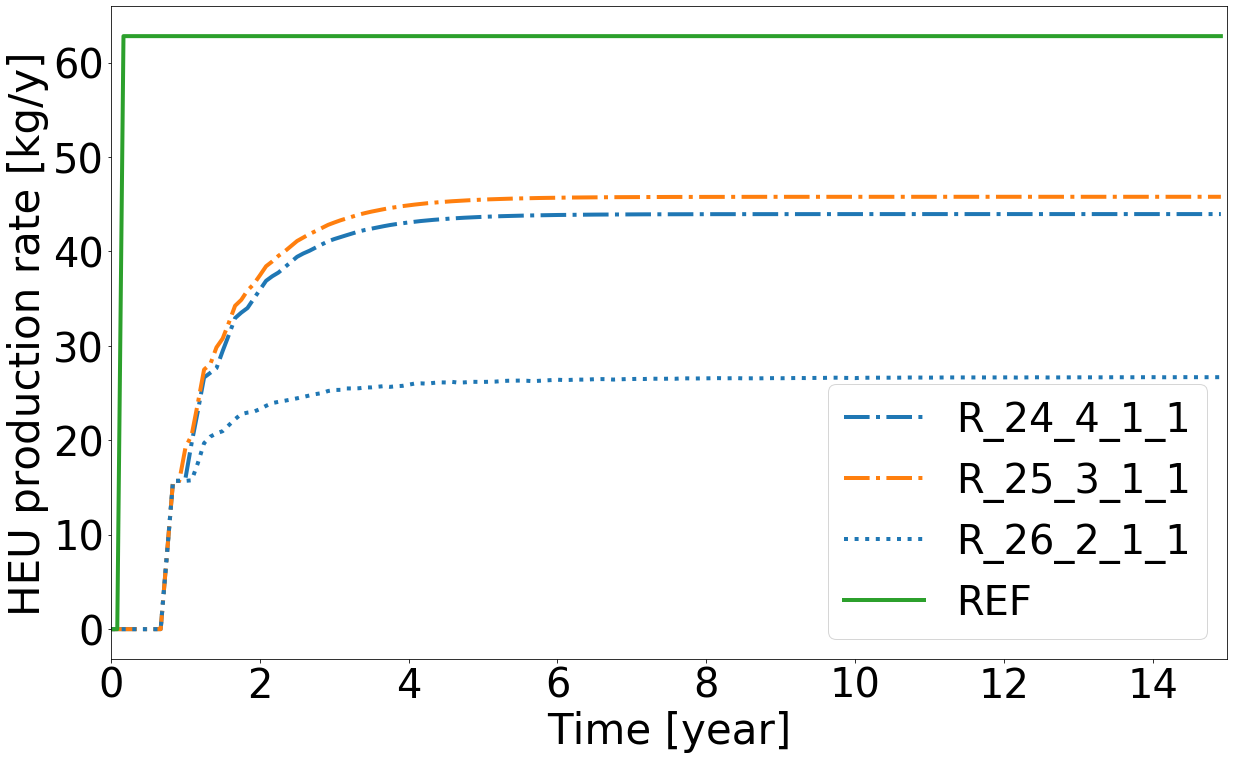

In [12]:
files = ['case_2/R_24_4_1_1.sqlite',
         'case_2/R_25_3_1_1.sqlite',
         'case_2/R_26_2_1_1.sqlite',
         'ref/ref.sqlite']
invs = ['storage_3',
        'storage_3',
        'storage_3',
        'storage']

c_names = ['R_24_4_1_1','R_25_3_1_1','R_26_2_1_1','REF']
LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []
style = ['-.', '-.', ':', '-']
color = ['C0', 'C1', 'C0', 'C2']

for i in range(4):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    #df_ = tm.inventories(ev_, [invs[i]])
    #df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    
    df_ = tm.transactions(ev_, receivers=[invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_[c_names[i]] *= 12
    df_['Time'] *= 1/12.
    
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], "\n ", df_.tail(1), "\n\n")
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU production rate [kg/y]", linestyle=style, color=color, mk="", lw=4 )
plt.xlabel('Time [year]')

x = np.arange(0, 16, 1)
plt.xlim(0,15)
plt.savefig('BR_production.png')


NR_24_4_1_1             Time  NR_24_4_1_1
179  14.916667      0.98857 

NR_25_3_1_1             Time  NR_25_3_1_1
179  14.916667      0.98857 

REF             Time       REF
179  14.916667  0.908696 



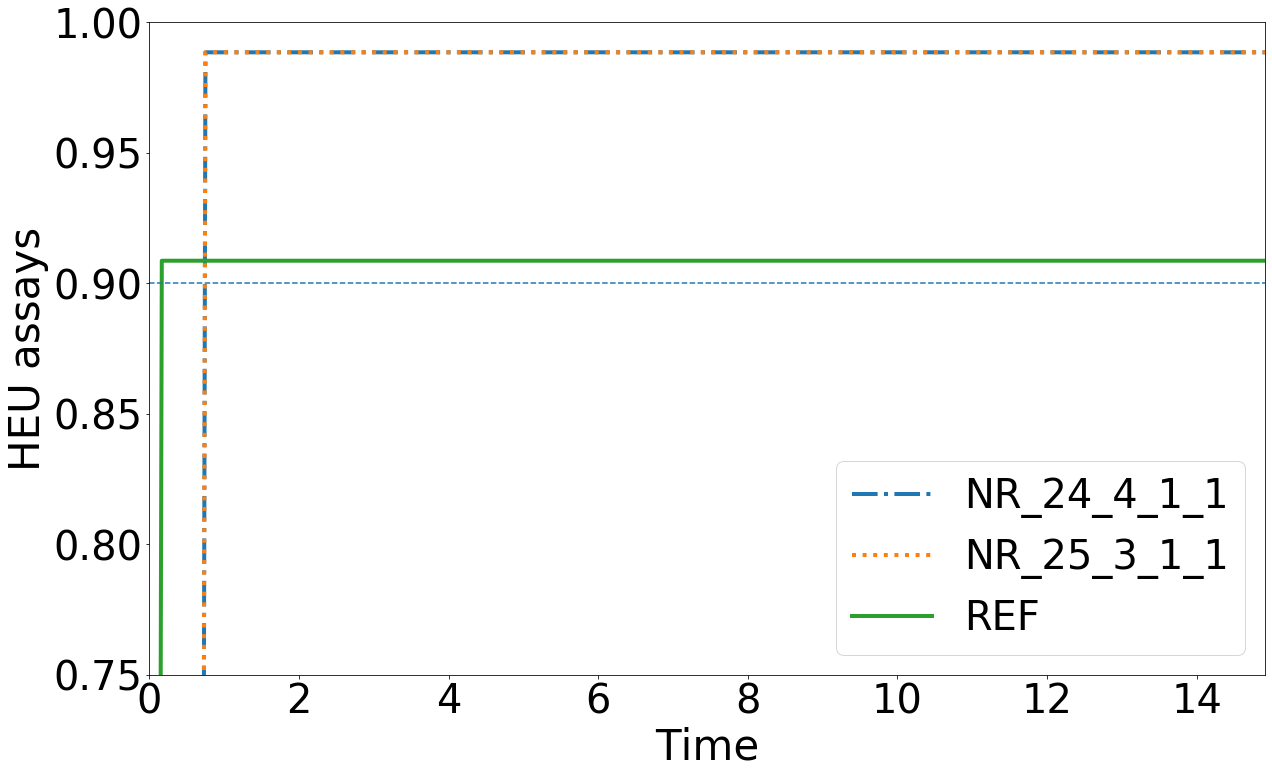

In [13]:
######################
# CASE 3: NO RECYCLING
files = ['case_3/NR_24_4_1_1.sqlite',
         'case_3/NR_25_3_1_1.sqlite',
         'ref/ref.sqlite']
receivers = ['storage_3',
        'storage_3',
        'storage']
nucs1 = ['238U']
nucs2 = ['235U']
uma_238u = 238050786.996e-6
uma_235u = 235043928.190e-6
style = ['-.', ':', '-']
color = ['C0', 'C1','C2']

c_names = ['NR_24_4_1_1','NR_25_3_1_1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(3):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)
    df_ = cyh.TransFrac(ev=ev_, rec=[receivers[i]],  nucs1=nucs1, nucs2=nucs2, factor1=uma_238u, factor2=uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
 
    df_['Time'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], " ", df_.tail(1), "\n")

pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU assays", linestyle=style, color=color, mk="", lw=4  )
plt.axhline(y=0.9, linestyle="--")

x = np.arange(0, 16, 1)
plt.ylim(0.75,1)
plt.savefig('CNR_assays.png')

NR_24_4_1_1 
            Time  NR_24_4_1_1
179  14.916667     4.380784 


NR_25_3_1_1 
            Time  NR_25_3_1_1
179  14.916667     4.563317 


REF 
            Time        REF
179  14.916667  62.802106 




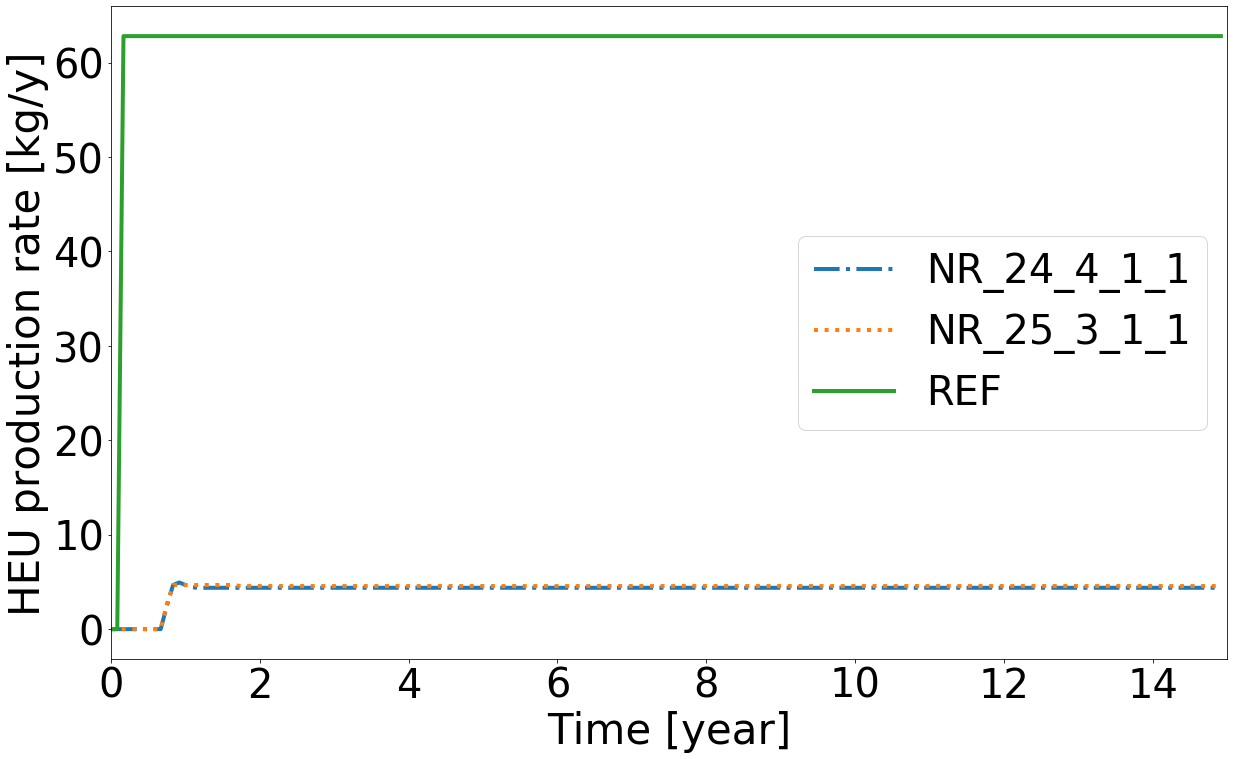

In [14]:
files = ['case_3/NR_24_4_1_1.sqlite',
         'case_3/NR_25_3_1_1.sqlite',
         'ref/ref.sqlite']
invs = ['storage_3',
        'storage_3',
        'storage']

c_names = ['NR_24_4_1_1','NR_25_3_1_1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []
style = ['-.', ':', '-']
color = ['C0', 'C1', 'C2']


for i in range(3):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    #df_ = tm.inventories(ev_, [invs[i]])
    #df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    
    df_ = tm.transactions(ev_, receivers=[invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_[c_names[i]] *= 12
    df_['Time'] *= 1/12.
    
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], "\n ", df_.tail(1), "\n\n")
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU production rate [kg/y]", linestyle=style, color=color, mk="", lw=4 )
plt.xlabel('Time [year]')

x = np.arange(0, 16, 1)
plt.xlim(0,15)
plt.savefig('CNR_production.png')



NR_25_4_1             Time  NR_25_4_1
179  14.916667   0.960074 

NR_26_3_1             Time  NR_26_3_1
179  14.916667   0.939063 

REF             Time       REF
179  14.916667  0.908696 



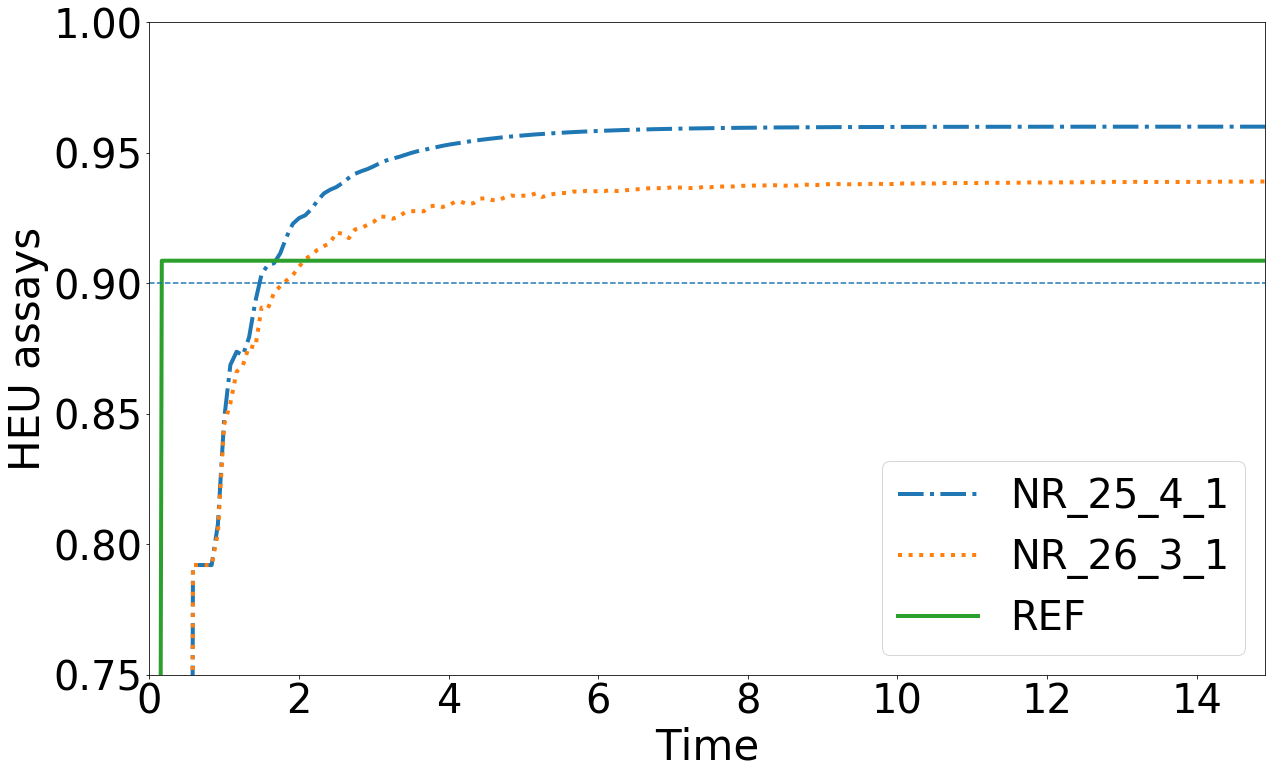

In [15]:
######################
# CASE 3: RECYCLING
files = ['case_3/R_25_4_1.sqlite',
         'case_3/R_26_3_1.sqlite',
         'ref/ref.sqlite']
receivers = ['storage_2',
        'storage_2',
        'storage']
nucs1 = ['238U']
nucs2 = ['235U']
uma_238u = 238050786.996e-6
uma_235u = 235043928.190e-6
style = ['-.', ':', '-']
color = ['C0', 'C1','C2']

c_names = ['NR_25_4_1','NR_26_3_1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(3):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)
    df_ = cyh.TransFrac(ev=ev_, rec=[receivers[i]],  nucs1=nucs1, nucs2=nucs2, factor1=uma_238u, factor2=uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
 
    df_['Time'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], " ", df_.tail(1), "\n")

pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU assays", linestyle=style, color=color, mk="", lw=4  )
plt.axhline(y=0.9, linestyle="--")

x = np.arange(0, 16, 1)
plt.ylim(0.75,1)
plt.savefig('CR_assays.png')

R_25_4_1 
            Time   R_25_4_1
179  14.916667  43.462694 


R_26_3_1 
            Time  R_26_3_1
179  14.916667  39.93401 


REF 
            Time        REF
179  14.916667  62.802106 




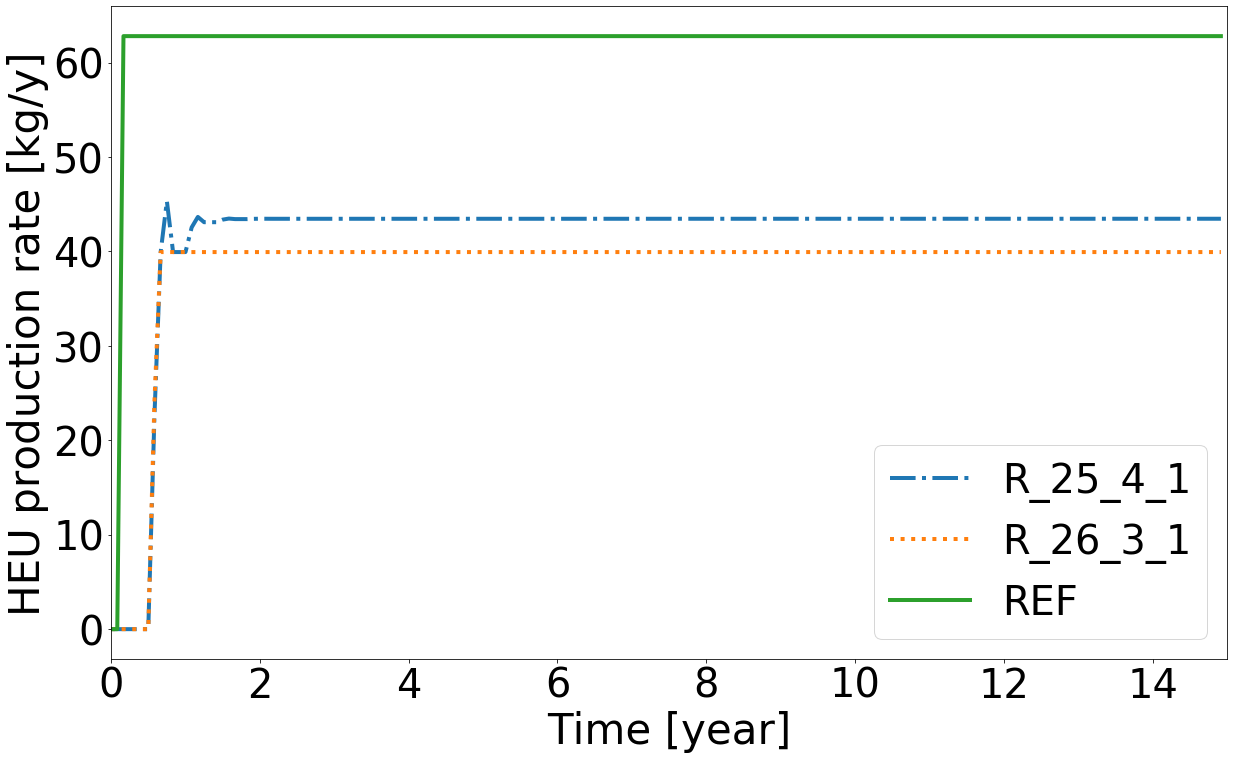

In [16]:
files = ['case_3/R_25_4_1.sqlite',
         'case_3/R_26_3_1.sqlite',
         'ref/ref.sqlite']
invs = ['storage_2',
        'storage_2',
        'storage']

c_names = ['R_25_4_1','R_26_3_1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []
style = ['-.', ':', '-']
color = ['C0', 'C1', 'C2']


for i in range(3):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    #df_ = tm.inventories(ev_, [invs[i]])
    #df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    
    df_ = tm.transactions(ev_, receivers=[invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_[c_names[i]] *= 12
    df_['Time'] *= 1/12.
    
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], "\n ", df_.tail(1), "\n\n")
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU production rate [kg/y]", linestyle=style, color=color, mk="", lw=4 )
plt.xlabel('Time [year]')

x = np.arange(0, 16, 1)
plt.xlim(0,15)
plt.savefig('CR_production.png')

